# Analysing Baseball game Data
## Zsombor Hegedűs & Brúnó Helmeczy

#### Prepared for: Coding 3: Data Analysis & Management with Python 
#### Instructor: Eszter Somos 
#### MSc Business Analytics @ Central European University
#### [Github](https://github.com/zsomborh/analyse_baseball_matches) 

In [3]:
import pandas as pd
import numpy as np

In [4]:
# We 1st load our dataframes: Our raw data consists of 3 tables:
    # Games: Available information on every single game (1 observation), 
        # including location, datetime, home & away teams, scores (features)
Games = pd.read_csv("games.csv")
        
    # Atbats: A game generally consists of 1 team throwing (pitching) the ball, the other trying to hit it far away.
        # Atbats are the occasion of a team (member) trying to hit the pitched ball away 
            # as such Atbats & Pitches have a 1-to-1 relationship
        # Available Features describe the player to hit, the player to throw, the game, its current inning, 
            # which team hits & what the outcome was  
Atbats = pd.read_csv("atbats.csv")
        
    # Pitches: how the ball is thrown can be described in much more detail then whether it has been succesfully hit or not.
        # a pitch can be summatively described by its type, which can be further specified by ball speed & spin.
            # speed can further be broken down by start- & ending speed,
            # spin can further be described by spin direction, spin angle 
                # the angle of curvature resulting from the ball spinning
            # such spin directions & angles enable using variables to describe 3d coordinates 
                #(features px, py, break_y, ax, ay, az, vx0, vy0, vz0, x, x0, y, y0, z0,pfx_x, pfx_z) 
            # Final group of variables describes the game situation pitches were played in + their outcomes:
                # b_score, b_count, s_count, outs, on_1b, on_2b, on_3b
Pitches = pd.read_csv("pitches.csv")

In [5]:
for df in [Games, Atbats, Pitches]:
    print(df.columns)

Index(['attendance', 'away_final_score', 'away_team', 'date', 'elapsed_time',
       'g_id', 'home_final_score', 'home_team', 'start_time', 'umpire_1B',
       'umpire_2B', 'umpire_3B', 'umpire_HP', 'venue_name', 'weather', 'wind',
       'delay'],
      dtype='object')
Index(['ab_id', 'batter_id', 'event', 'g_id', 'inning', 'o', 'p_score',
       'p_throws', 'pitcher_id', 'stand', 'top'],
      dtype='object')
Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')


In [6]:
# As said, pitches & atbats are 1-to-1 match, & they can be allocated to the game they happened in
# enabling us to join the 3 data frames in a single table:
    # Games['g_id'] == Atbats['g_id']
    # Pitches['ab_id'] == Atbats['ab_id']
# We also descretely select only a subset of available features
    # We hazard the use of 3d corrdinate variables to model movement in space-time is beyond our skills therefore not useful

# Selecting subsets of features per dataframe
Games = Games[['g_id','attendance','venue_name',
               'date','start_time', 'elapsed_time','delay','weather','wind',
               'away_team','home_team','away_final_score','home_final_score']]
Atbats = Atbats[['ab_id','event','g_id','inning','o','p_score','p_throws','stand','top']]
Pitches = Pitches[['ab_id','type','b_count','s_count','outs',
                   'pitch_type','pitch_num','spin_rate','start_speed','end_speed',
                   'code','zone']]

# Merging dataframes:
Pitches_n_Atbats = pd.merge(Pitches,Atbats, how = 'left')
Df_Merged = pd.merge(Pitches_n_Atbats, Games, how = 'left')
Df_Merged.to_csv("Baseball_Merged.csv", index = False)
# Column Descriptions:
    # type = pitch_type: 
        # CH=Changeup, CU=Curveball, EP=Eephus*, FC=Cutter, FF=Four-seam Fastball, FO=Pitchout (or PO)
        #  FS=Splitter, FT=2-seam Fastball, IN=Intentional ball, KC=Knuckle curve, KN=Knuckeball, 
        #  PO=Pitchout (or FO), SC=Screwball, SI=Sinker, SL=Slider,UN=Unknown
    # b_count     - Balls hit (in current round)
    # s_count     - Strikes   (in current round)
    # outs        - How many outs are there for the hitting team in the current inning - should be 0-2
    # spin_rate   - Of ball in rounds per minute (RPM
    # start_speed - Ball speed at release
    # end_speed   - Ball speed at hit 
    # event       - Outcome of Pitch/Atbat - what the pitch resulted in 
    # inning      - should be 1-9 -> Like quarters in NBA/NFL - baseball is played in 9 innings -> can have overtime innings
    # stand       - Batter Left/Right handed stand
    # top         - Yes/No -  Innings consist of 2 halves, the "top" (first) & "bottom" (second). 
        # In each half, one team bats until 3 outs are made, with other team playing defense. 
    # delay       - Game started late by X minutes
    # weather     - weather-description string 
    # wind        - string with windspeed inside
    # away_team
    # home_team
    # away_final_score
    # home_final_score

In [7]:
# Checking for NA values:
Df_Merged.dropna(subset = ['zone']).isna().sum()

ab_id                  0
type                   0
b_count                0
s_count                0
outs                   0
pitch_type             0
pitch_num              0
spin_rate              0
start_speed            0
end_speed              0
code                5715
zone                   0
event                  0
g_id                   0
inning                 0
o                      0
p_score                0
p_throws               0
stand                  0
top                    0
attendance             0
venue_name             0
date                   0
start_time             0
elapsed_time           0
delay                  0
weather                0
wind                   0
away_team              0
home_team              0
away_final_score       0
home_final_score       0
dtype: int64

(array([4.85605025e-05, 1.47018035e-04, 2.26246297e-04, 2.64180521e-04,
        2.71506493e-04, 2.83438742e-04, 3.32045886e-04, 4.28264614e-04,
        5.57235506e-04, 6.74590992e-04, 6.35822042e-04, 4.18402295e-04,
        1.99517354e-04, 7.44080777e-05, 2.10466908e-05, 4.71564248e-06,
        9.53743517e-07, 2.94325571e-07, 1.19016898e-07, 5.14667665e-08,
        5.46834394e-08, 1.76917010e-08, 1.44750281e-08, 9.65001872e-09,
        4.82500936e-09, 1.60833645e-09, 0.00000000e+00, 0.00000000e+00,
        1.60833645e-09, 4.82500936e-09]),
 array([1.21400000e+00, 2.19148833e+02, 4.37083667e+02, 6.55018500e+02,
        8.72953333e+02, 1.09088817e+03, 1.30882300e+03, 1.52675783e+03,
        1.74469267e+03, 1.96262750e+03, 2.18056233e+03, 2.39849717e+03,
        2.61643200e+03, 2.83436683e+03, 3.05230167e+03, 3.27023650e+03,
        3.48817133e+03, 3.70610617e+03, 3.92404100e+03, 4.14197583e+03,
        4.35991067e+03, 4.57784550e+03, 4.79578033e+03, 5.01371517e+03,
        5.23165000e+03

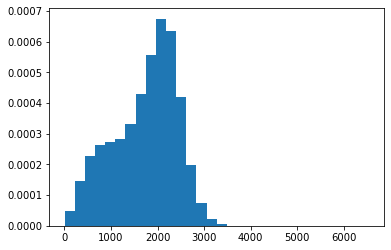

In [8]:
# We are interested in how pitches' measures change in response to various characteristics:
# In particular, our 1st question explores how pitch speed is affected by wind speed:
                    
# 2 foreseeably important features for this assessment are spin rate & start- & ending speed
    # Thus, please see below their density histograms:

import matplotlib.pyplot as plt 
%matplotlib inline

plt.hist(x  = Df_Merged['spin_rate'], density = True, bins = 30)
# We see pithces' spin rate range between 0-3000 rounds per minute (RPM)
    # the maximum is equivalent to 50 rounds/rotations per second 
    # most frequently however, spin rate is around 2000 RPM - i.e. ca. 33 rotations per second

(array([1.63024801e-07, 1.63024801e-07, 1.95629762e-06, 4.89074404e-06,
        5.70586805e-06, 7.01006646e-06, 1.20638353e-05, 1.40201329e-05,
        2.11932242e-05, 2.91814394e-05, 4.82553412e-05, 7.54804830e-05,
        1.85033149e-04, 4.24679607e-04, 1.02298063e-03, 2.70441843e-03,
        6.41176543e-03, 1.09135323e-02, 1.93184390e-02, 2.76051526e-02,
        3.95613916e-02, 4.52807907e-02, 5.66840495e-02, 7.70577479e-02,
        9.29895097e-02, 5.98517844e-02, 2.16188819e-02, 2.98791856e-03,
        2.62959004e-04, 1.51613065e-05]),
 array([32.4 , 34.55, 36.7 , 38.85, 41.  , 43.15, 45.3 , 47.45, 49.6 ,
        51.75, 53.9 , 56.05, 58.2 , 60.35, 62.5 , 64.65, 66.8 , 68.95,
        71.1 , 73.25, 75.4 , 77.55, 79.7 , 81.85, 84.  , 86.15, 88.3 ,
        90.45, 92.6 , 94.75, 96.9 ]),
 <BarContainer object of 30 artists>)

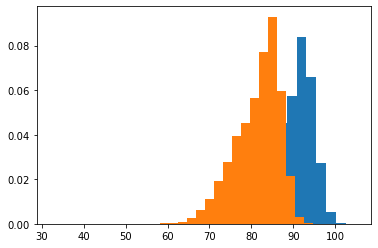

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.hist(x  = Df_Merged['start_speed'], density = True, bins = 30) # blue
plt.hist(x  = Df_Merged['end_speed'], density = True, bins = 30) # orange
# no legend denotes variable-color pairing, ending speed is obviously lower (due to gravity)
    # interestingly we can see a simple shift in the distribution to the left (decreasing spped by a constant amount)
    # based on this we could hazard decreasing ball speed does not depend on other factors then gravity beating the balls' inertia

In [10]:
len(Df_Merged)

2867154

## Cleaning

In [11]:
Df_Merged.dropna(subset = ['zone'], inplace = True)
Df_Merged.loc[Df_Merged['code'].isna(),['code']] = 'Unknown'
Df_Merged.isna().sum()

ab_id               0
type                0
b_count             0
s_count             0
outs                0
pitch_type          0
pitch_num           0
spin_rate           0
start_speed         0
end_speed           0
code                0
zone                0
event               0
g_id                0
inning              0
o                   0
p_score             0
p_throws            0
stand               0
top                 0
attendance          0
venue_name          0
date                0
start_time          0
elapsed_time        0
delay               0
weather             0
wind                0
away_team           0
home_team           0
away_final_score    0
home_final_score    0
dtype: int64

In [12]:
Df_Merged.dtypes

ab_id               float64
type                 object
b_count             float64
s_count             float64
outs                float64
pitch_type           object
pitch_num           float64
spin_rate           float64
start_speed         float64
end_speed           float64
code                 object
zone                float64
event                object
g_id                  int64
inning                int64
o                     int64
p_score               int64
p_throws             object
stand                object
top                    bool
attendance            int64
venue_name           object
date                 object
start_time           object
elapsed_time          int64
delay                 int64
weather              object
wind                 object
away_team            object
home_team            object
away_final_score      int64
home_final_score      int64
dtype: object

In [16]:
# Get Wind speed in MpH & Weather in Fahrenheit
wind_mph = []
for i in Df_Merged['wind'][0:]:
    wind_speed = int(i[:2])
    wind_mph.append(wind_speed)

weather_fhr = []
for i in Df_Merged['weather'][0:]:
    weather_F = int(i[:3])
    weather_fhr.append(weather_F)

Df_Merged['wind'] = wind_mph 
Df_Merged['weather'] = weather_fhr

### Summary Stats Table

In [17]:
summarydata = []
for cols in Df_Merged.columns:
    if (Df_Merged[cols].dtypes == 'int64') | (Df_Merged[cols].dtypes == 'float64') | (Df_Merged[cols].dtypes == 'bool'):
        stats = []
        stats.append(cols)
        stats.append(Df_Merged[cols].min())
        stats.append(Df_Merged[cols].mean())
        stats.append(Df_Merged[cols].median())
        stats.append(Df_Merged[cols].max())
        stats.append(len(Df_Merged[cols].unique()))
        summarydata.append(stats)

summarydata = pd.DataFrame(summarydata)
summarydata.columns = ['Variable','Min_Value','Mean','Median','Max_Value','Nr_Unique Values']
summarydata = summarydata[(summarydata['Variable'] != 'g_id') & (summarydata['Variable'] != 'ab_id') ]
summarydata

,Variable,Min_Value,Mean,Median,Max_Value,Nr_Unique Values
1,b_count,0,0.880707,1.000,4,5
2,s_count,0,0.883161,1.000,2,3
3,outs,0,0.981285,1.000,2,3
4,pitch_num,1,2.895127,3.000,21,21
5,spin_rate,1.214,1731.172889,1866.322,6539.26,1687547
6,start_speed,33.9,88.381244,89.700,105,627
7,end_speed,32.4,81.362756,82.500,96.9,574
8,zone,1,9.819750,11.000,14,13
10,inning,1,5.002603,5.000,19,19
11,o,0,1.673902,2.000,3,4


### Aggregation
By default our merged dataframe consists of over 2.8 millions rows. To manage this, we first group our observations too innings of every game. Due to cost related to requesting weather data via the API, we also only consider game in 2017 & 2018. A related matter is deciding how many pitch types should we keep from the original 18 values. Some pitch types are rare, or may not be meaningfully different from another pitch type, so we would like to reduce them to meaningful categories.

In [18]:
# Aggregation to per Inning per Game
for col in ['type','b_count','s_count','outs','pitch_type']:
    print(Df_Merged[col].unique())
    print(len(Df_Merged[col].unique()))

['S' 'B' 'X']
3
[0. 1. 2. 3. 4.]
5
[0. 1. 2.]
3
[0. 1. 2.]
3
['FF' 'CU' 'FC' 'SI' 'CH' 'FT' 'IN' 'SL' 'KC' 'EP' 'FS' 'FO' 'PO' 'KN'
 'UN' 'SC' 'FA' 'AB']
18


In [19]:
Df_Merged.groupby('pitch_type').size().sort_values(ascending=False)

pitch_type
FF    1014877
SL     450578
FT     337983
CH     292789
SI     242504
CU     234391
FC     149756
KC      66484
FS      43705
KN      11260
IN       6197
EP        815
FO        810
PO        628
SC        113
UN         57
FA          9
AB          9
dtype: int64

In [20]:
# Above you can see the number of pitches by pitchtype. 
# Variable descriptions available on Kaggle also note FF & FT are sub-categories of Fastballs, and FO & PO of Pitchouts.
# We also choose to coerce resulting categories with less then 10.000 pitches into 'Other'
#  From 2.8 million observations, this means 0.03% of all observations.

df = Df_Merged.copy()
# FF = FT = Fastball
df['pitch_type'][df['pitch_type'] == 'FT' ] = 'FF'

# FO = PO = Pitchout
df['pitch_type'][df['pitch_type'] == 'FO' ] = 'PO'

# TO coerce to 'Other': IN, EP, FO, PO, SC, UN, AB, FA
df['pitch_type'][(df['pitch_type']=='IN') | (df['pitch_type']=='EP') | (df['pitch_type']=='FO') | (df['pitch_type']=='PO') | (df['pitch_type']=='SC') | (df['pitch_type']=='UN') | (df['pitch_type']=='AB') | (df['pitch_type']=='FA') ] = 'Other'

df.groupby(['pitch_type']).size().sort_values(ascending=False)

<ipython-input-20-28eaac924750>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pitch_type'][df['pitch_type'] == 'FT' ] = 'FF'
<ipython-input-20-28eaac924750>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pitch_type'][df['pitch_type'] == 'FO' ] = 'PO'
<ipython-input-20-28eaac924750>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pitch_type'][(df['pitch_type']=='IN') | (df['pitch_type']=='EP') | (df['pitch_type']=='F

pitch_type
FF       1352860
SL        450578
CH        292789
SI        242504
CU        234391
FC        149756
KC         66484
FS         43705
KN         11260
Other       8638
dtype: int64

### How different are remaining pitchtypes ?

In [21]:
# As 1st trial we want to check how characteristically different various pitch types may be
# We want to check differences in the most meaningful stats, i.e.:
#  How fast the ball was at release & at hit, how much was it spinning, & 
#  How different the game situation is on average, given the pitch type:

pitchgrouped = df.groupby('pitch_type').mean().round(2)
pitchgrouped['Nr_Obs_percent'] = round(df.groupby(['pitch_type']).size()/(len(df)),4)*100
pitchgrouped = pitchgrouped.sort_values(ascending=False, by = 'Nr_Obs_percent')
pitchgrouped[['Nr_Obs_percent','start_speed','end_speed','spin_rate','wind','weather','inning','outs','b_count','s_count']]


# We can see Fastballs are the overwhelmingly favorite pitch choice for throwers, with 47.4% of all observations.
#  Interestingly, though it is a 'fastball' it is similar to a 'Sinker' ball, in its start- & end-speed, & spin-rate.
    # The sinker pitch is known for inducing ground balls, & is thrown with hard downward movement.
# The 'Slider' & 'Changeup' pitches round out the top 3. 
    # The former is basically a semi-curveball, little faster & with less spin
    # The 'Changeup' pitch is the trick play, the pitcher selling to throw a fast ball but 
        # break hitters' rhythm with a slower-then-expected ball. Like a 'Panyenka' in soccer penalties

,Nr_Obs_percent,start_speed,end_speed,spin_rate,wind,weather,inning,outs,b_count,s_count
pitch_type,,,,,,,,,,
FF,47.42,92.70,85.05,2162.34,7.51,73.65,4.92,0.96,0.93,0.81
SL,15.79,84.36,78.13,796.09,7.43,73.88,5.38,1.02,0.82,1.03
CH,10.26,83.85,77.34,1732.42,7.54,73.55,4.77,1.00,0.93,0.96
SI,8.50,91.42,84.01,2102.41,7.65,73.35,5.22,0.95,0.91,0.75
CU,8.22,77.87,72.01,1259.93,7.57,73.69,4.75,1.01,0.66,1.00
FC,5.25,88.24,81.67,1148.87,7.43,73.22,5.13,0.99,0.90,0.89
KC,2.33,80.47,74.35,1279.83,7.38,73.56,4.95,1.02,0.71,0.99
FS,1.53,84.62,78.19,1435.90,7.16,73.16,5.11,1.01,0.94,1.12
KN,0.39,75.81,69.37,852.30,7.50,72.35,3.95,0.96,0.77,0.85


### Exploring Variable distributions
Though readers may find high quality variable description on Kaggle (https://www.kaggle.com/pschale/mlb-pitch-data-20152018?select=pitches.csv), please find below variables' frequency distributions. We use a simple loop to conveniently get all numeric features' histograms.  

b_count


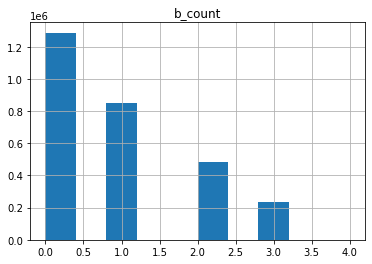

s_count


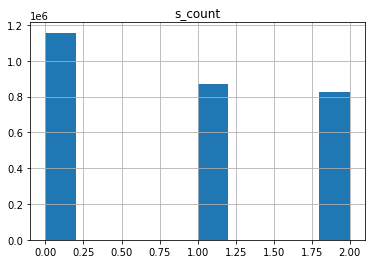

outs


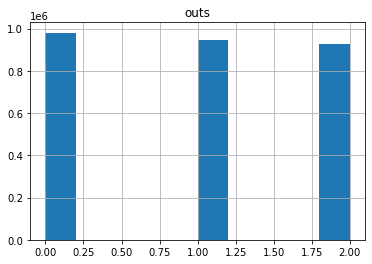

pitch_num


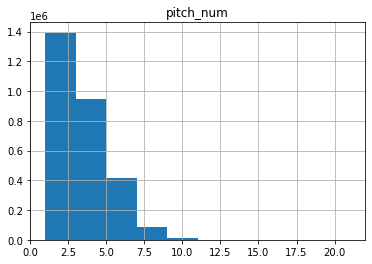

spin_rate


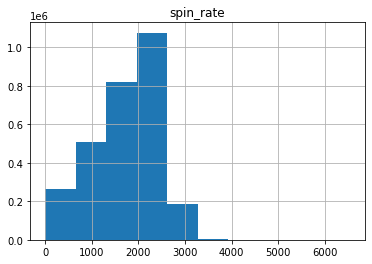

start_speed


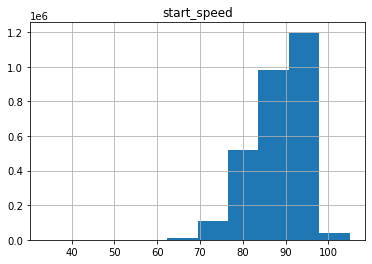

end_speed


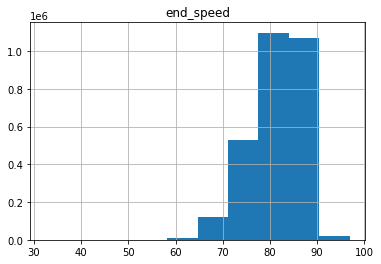

zone


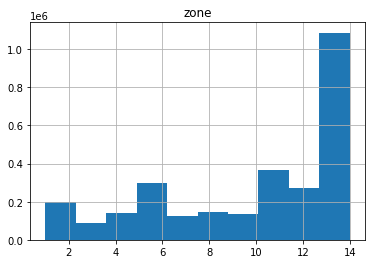

g_id


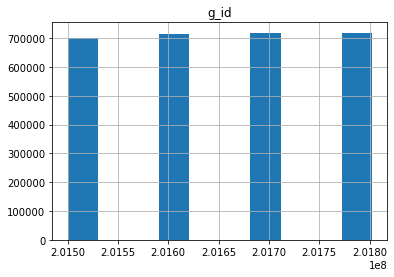

inning


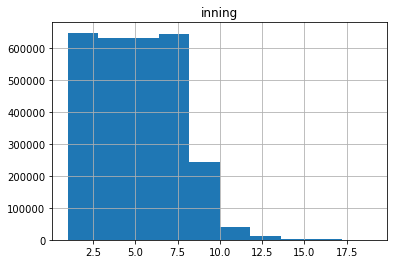

o


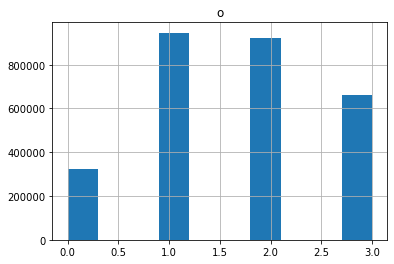

p_score


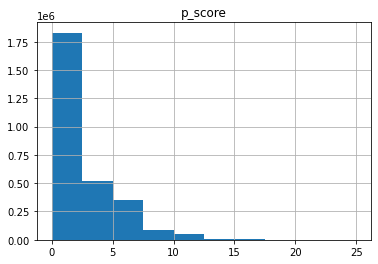

attendance


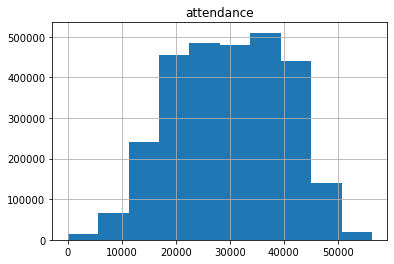

elapsed_time


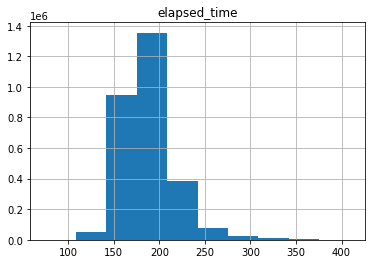

delay


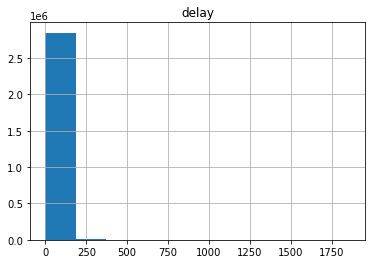

weather


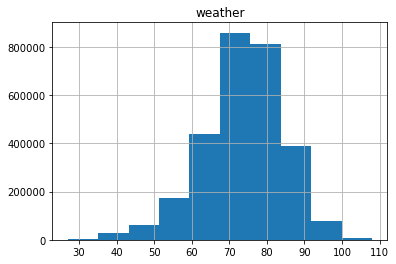

wind


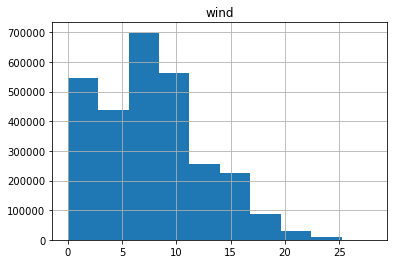

In [22]:
# EDA: Basic histogram of all vars w 1 loop
import matplotlib.pyplot as plt
%matplotlib inline

ColNames = df.columns.tolist()[1:-4]
vector = range(1,len(ColNames),1)

for i in vector:
    if df[ColNames[i]].dtypes == 'float64':
        print(ColNames[i])
        df.hist(ColNames[i])
    elif df[ColNames[i]].dtypes == 'int64':
        print(ColNames[i])
        df.hist(ColNames[i])
    plt.show()


### Trying to Condense Pitch Type values using Clustering
As said we have 10 remaining pitch-types after coercing the most infrequent types. A modelling exercise beyond our capacity would likely use a multinomial logit model to predict pitch types given available variables. We simply resort to checking to how many groups can pitches be categorized into, given speep, spin rate & game situations.

In [23]:
tocluster = df[['start_speed','end_speed','spin_rate','pitch_num','outs','inning','b_count','s_count']]
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from collections import Counter

In [24]:
# Choose K
dists = []
for cluster_num in range(3,9):
    print(cluster_num)
    estimator = KMeans(init='k-means++', n_clusters=cluster_num)
    estimator.fit(scale(tocluster))
    dists.append(estimator.inertia_)

3
4
5
6
7
8


<AxesSubplot:xlabel='n_clusters'>

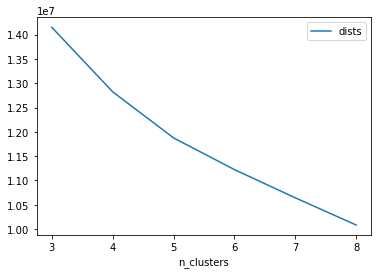

In [25]:
# Plot 2 check 4 Elbox point
pd.DataFrame({'dists':dists, 'n_clusters':list(range(3,9))}).plot(x='n_clusters',y='dists')

# As can be seen below, the optimal number of clusters  to segment pitchtypes into is not so obvious.
# One may observe 4-5 clusters to result in highest marginal decrease in distances, 
    # though this choice does not seem undisputably optimal ( it isn't a sharp elbow )

In [26]:
df[df.columns[(df.columns != 'type') & (df.columns != 'code') & (df.columns != 'pitch_type')  & (df.columns != 'event') & (df.columns != 'away_final_score') & (df.columns != 'home_final_score') & (df.columns != 'away_team') & (df.columns != 'home_team') & (df.columns != 'stand') & (df.columns != 'top')]]

,ab_id,b_count,s_count,outs,pitch_num,spin_rate,start_speed,end_speed,zone,g_id,...,p_score,p_throws,attendance,venue_name,date,start_time,elapsed_time,delay,weather,wind
0,2.015000e+09,0.0,0.0,0.0,1.0,2305.052,92.9,84.1,3.0,201500001,...,0,L,35055,Wrigley Field,2015-04-05,7:17 PM,184,0,44,7
1,2.015000e+09,0.0,1.0,0.0,2.0,2689.935,92.8,84.1,5.0,201500001,...,0,L,35055,Wrigley Field,2015-04-05,7:17 PM,184,0,44,7
2,2.015000e+09,0.0,2.0,0.0,3.0,2647.972,94.1,85.2,1.0,201500001,...,0,L,35055,Wrigley Field,2015-04-05,7:17 PM,184,0,44,7
3,2.015000e+09,0.0,2.0,0.0,4.0,1289.590,91.0,84.0,13.0,201500001,...,0,L,35055,Wrigley Field,2015-04-05,7:17 PM,184,0,44,7
4,2.015000e+09,1.0,2.0,0.0,5.0,1374.569,75.4,69.6,13.0,201500001,...,0,L,35055,Wrigley Field,2015-04-05,7:17 PM,184,0,44,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867149,2.018186e+09,3.0,2.0,2.0,9.0,608.594,83.9,78.2,8.0,201802431,...,3,L,38450,Wrigley Field,2018-10-01,12:05 PM,186,0,65,6
2867150,2.018186e+09,0.0,0.0,2.0,1.0,2262.907,97.7,89.5,13.0,201802431,...,3,L,38450,Wrigley Field,2018-10-01,12:05 PM,186,0,65,6
2867151,2.018186e+09,1.0,0.0,2.0,2.0,2514.010,97.3,89.6,4.0,201802431,...,3,L,38450,Wrigley Field,2018-10-01,12:05 PM,186,0,65,6
2867152,2.018186e+09,1.0,1.0,2.0,3.0,2318.775,95.9,88.6,13.0,201802431,...,3,L,38450,Wrigley Field,2018-10-01,12:05 PM,186,0,65,6


### Get Most Frequent Pitch type & propensity, given a game & its inning 
Due to the above we try a different approach, also keeping an eye on trying to reduce the number of observations to under 1 million. Our aim is to group our merged data by game & inning, & keep summary statistics of the pitch types.

We do this by 1st grouping by game & inning, pivot pitch types to columns & count how many pitches occurred from any given pitch type. We then identify which pitch occurred most often in a given inning of any game, the total pitches happening & the proportion of pitches belonging to the most frequent pitch types.

In [27]:
df_grouped2 = df.groupby(['g_id','date','inning','wind','weather','venue_name','pitch_type']).mean().reset_index()
Pitch_dummies = df[['g_id','date','inning','pitch_type']]

In [28]:
# Pivot Pitchtype Cols & Count pitch types grouped by games & Inning
for i in Pitch_dummies['pitch_type'].unique():
    Pitch_dummies[i] = Pitch_dummies['pitch_type'] == i
Pitch_Counts = Pitch_dummies.groupby(['g_id','date','inning']).sum().reset_index()

# Row Sum Pitches & Get max Value - i.e. count pitches by game-inning & get most frequent pitch type
Pitch_Counts['Total_Pitches'] = Pitch_Counts[Pitch_dummies['pitch_type'].unique()].sum(axis = 1)
Pitch_Counts['Max_Pitch_Count'] = Pitch_Counts[Pitch_dummies['pitch_type'].unique()].max(axis = 1)


<ipython-input-28-a30edbcd8ce1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pitch_dummies[i] = Pitch_dummies['pitch_type'] == i


In [29]:
# 1: Get NumPy array of pitch counts per pitch type, game & Inning
Pitches_Numpy = Pitch_Counts[Pitch_dummies['pitch_type'].unique()].to_numpy(dtype=None, copy=False)

# 2: Get column indices per row of highest pitch count
Max_Indices = np.argmax(Pitches_Numpy, axis = 1)

# 3: Get pitch type belonging to highest pitch count in every row
Most_Freq_Pitch = Pitch_dummies['pitch_type'].unique()[Max_Indices]

# 4: Assign 3) to new column
Pitch_Counts['Most_Freq_Pitch'] = Most_Freq_Pitch

# 5: Count proportion from 4) & total pitches counted
Pitch_Counts['Most_Freq_Pitch%'] = round(Pitch_Counts['Max_Pitch_Count'] / Pitch_Counts['Total_Pitches'],4)*100

# 6: Keep pivoted pitch type columes & keep sum stats only
Pitches_Fin = Pitch_Counts[['g_id','date','inning','Total_Pitches','Max_Pitch_Count','Most_Freq_Pitch','Most_Freq_Pitch%']]
Pitches_Fin

# Resulting from the above, our grouped pitch-data dataframe consists of ca. 89 thousand observations.

,g_id,date,inning,Total_Pitches,Max_Pitch_Count,Most_Freq_Pitch,Most_Freq_Pitch%
0,201500001,2015-04-05,1,34,17,FF,50.00
1,201500001,2015-04-05,2,37,18,FF,48.65
2,201500001,2015-04-05,3,41,16,CU,39.02
3,201500001,2015-04-05,4,27,14,FF,51.85
4,201500001,2015-04-05,5,44,16,FF,36.36
...,...,...,...,...,...,...,...
89067,201802431,2018-10-01,5,24,14,SL,58.33
89068,201802431,2018-10-01,6,38,14,FF,36.84
89069,201802431,2018-10-01,7,16,9,FF,56.25
89070,201802431,2018-10-01,8,47,22,FF,46.81


In [30]:
# We now again group our original merged data frame, taking a mean of all variables we didn't group by
df_grouped = df.groupby(['g_id','inning','wind','weather','venue_name']).mean().reset_index()

# Next we merge this grouped dataframe with the pitch-data dataframe from above
df_grouped_merged = pd.merge(df_grouped, 
                             Pitch_Counts[['g_id','date','inning','Total_Pitches','Max_Pitch_Count','Most_Freq_Pitch','Most_Freq_Pitch%']],
                             how='left', left_on=['g_id','inning'], right_on=['g_id','inning'])

# Due to cost related to using the weather API, we restrict ourselves to data from the 2017-18 & 2018-19 seasons
df_grouped_merged = df_grouped_merged[df_grouped_merged['g_id'] >= 201700001]
df_grouped_merged
# As can be seen, this halves our grouped dataframe, resulting in 44.5 thousand observations

,g_id,inning,wind,weather,venue_name,ab_id,b_count,s_count,outs,pitch_num,...,attendance,elapsed_time,delay,away_final_score,home_final_score,date,Total_Pitches,Max_Pitch_Count,Most_Freq_Pitch,Most_Freq_Pitch%
44565,201700001,1,8,63,Busch Stadium,2.017000e+09,0.870968,0.741935,0.741935,2.612903,...,47566.0,213.0,0.0,3.0,4.0,2017-04-02,31,14,FF,45.16
44566,201700001,2,8,63,Busch Stadium,2.017000e+09,1.000000,1.195122,0.731707,3.365854,...,47566.0,213.0,0.0,3.0,4.0,2017-04-02,41,18,FF,43.90
44567,201700001,3,8,63,Busch Stadium,2.017000e+09,0.804348,1.021739,1.043478,2.978261,...,47566.0,213.0,0.0,3.0,4.0,2017-04-02,46,14,FF,30.43
44568,201700001,4,8,63,Busch Stadium,2.017000e+09,0.722222,0.333333,0.944444,2.055556,...,47566.0,213.0,0.0,3.0,4.0,2017-04-02,18,5,CH,27.78
44569,201700001,5,8,63,Busch Stadium,2.017000e+09,0.960000,0.720000,1.280000,2.680000,...,47566.0,213.0,0.0,3.0,4.0,2017-04-02,25,18,FF,72.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89067,201802431,5,6,65,Wrigley Field,2.018186e+09,1.000000,0.791667,1.000000,2.833333,...,38450.0,186.0,0.0,3.0,1.0,2018-10-01,24,14,SL,58.33
89068,201802431,6,6,65,Wrigley Field,2.018186e+09,1.394737,0.657895,0.868421,3.052632,...,38450.0,186.0,0.0,3.0,1.0,2018-10-01,38,14,FF,36.84
89069,201802431,7,6,65,Wrigley Field,2.018186e+09,0.625000,0.500000,1.125000,2.125000,...,38450.0,186.0,0.0,3.0,1.0,2018-10-01,16,9,FF,56.25
89070,201802431,8,6,65,Wrigley Field,2.018186e+09,1.085106,1.063830,0.723404,3.404255,...,38450.0,186.0,0.0,3.0,1.0,2018-10-01,47,22,FF,46.81


In [31]:
# What's left is summarizing key information from the table above, by the most frequent pitch type found by inning
summarybygame = df_grouped_merged.groupby('Most_Freq_Pitch').mean().round(2)
summarybygame['Nr_Games'] = round(df_grouped_merged.groupby('Most_Freq_Pitch').size()/(len(df_grouped_merged)),2)*100
summarybygame = summarybygame.sort_values(ascending = False, by = 'Nr_Games') 
summarybygame[['Nr_Games','b_count','s_count','spin_rate','delay','Total_Pitches','start_speed','end_speed']]
# The summary table below paints a clearer picture: though the simple fastball was only 47.5% of all pitches thrown,
    # it is the most frequent pitch type in every 4 of 5 inning in any game
# Together with the sinker & slider pitches, 94% of all innings had these 3 pitch types as their most frequent 

,Nr_Games,b_count,s_count,spin_rate,delay,Total_Pitches,start_speed,end_speed
Most_Freq_Pitch,,,,,,,,
FF,81.0,0.86,0.88,1765.63,4.15,32.66,88.90,81.56
SI,8.0,0.85,0.85,1773.64,4.20,31.31,88.46,81.14
SL,5.0,0.81,0.90,1456.63,3.80,30.85,87.29,80.22
FC,2.0,0.82,0.87,1528.35,2.65,29.12,88.61,81.49
CH,1.0,0.81,0.88,1710.52,2.74,30.18,85.72,78.70
CU,1.0,0.77,0.88,1571.80,3.73,29.48,84.91,78.03
FS,0.0,0.78,0.92,1639.76,3.31,25.62,87.74,80.44
KC,0.0,0.82,0.90,1521.87,2.32,29.84,86.40,79.31
KN,0.0,0.76,0.84,1266.00,6.27,30.93,81.72,74.87


In [32]:
# As an additional variable, we also wanted to include game length, which we measure in the number of innings played in a game
    # It is 9 by default, but can virtually go for infinite lengths 
        # (like in the NBA, or in quidditch if you're a Harry Potter fan)
MaxInnings = df_grouped_merged[['g_id','inning']].groupby('g_id').max()
MaxInnings.columns = ['Game_Length_Innings']

In [33]:
# After merging in the variable from above, we have our final dataset ready for modelling, & as such we save it to csv
df_grouped_merged = pd.merge(df_grouped_merged,MaxInnings, on = 'g_id')
df_grouped_merged.to_csv("Baseball_merged_fin.csv")
df_grouped_merged                           

,g_id,inning,wind,weather,venue_name,ab_id,b_count,s_count,outs,pitch_num,...,elapsed_time,delay,away_final_score,home_final_score,date,Total_Pitches,Max_Pitch_Count,Most_Freq_Pitch,Most_Freq_Pitch%,Game_Length_Innings
0,201700001,1,8,63,Busch Stadium,2.017000e+09,0.870968,0.741935,0.741935,2.612903,...,213.0,0.0,3.0,4.0,2017-04-02,31,14,FF,45.16,9
1,201700001,2,8,63,Busch Stadium,2.017000e+09,1.000000,1.195122,0.731707,3.365854,...,213.0,0.0,3.0,4.0,2017-04-02,41,18,FF,43.90,9
2,201700001,3,8,63,Busch Stadium,2.017000e+09,0.804348,1.021739,1.043478,2.978261,...,213.0,0.0,3.0,4.0,2017-04-02,46,14,FF,30.43,9
3,201700001,4,8,63,Busch Stadium,2.017000e+09,0.722222,0.333333,0.944444,2.055556,...,213.0,0.0,3.0,4.0,2017-04-02,18,5,CH,27.78,9
4,201700001,5,8,63,Busch Stadium,2.017000e+09,0.960000,0.720000,1.280000,2.680000,...,213.0,0.0,3.0,4.0,2017-04-02,25,18,FF,72.00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44502,201802431,5,6,65,Wrigley Field,2.018186e+09,1.000000,0.791667,1.000000,2.833333,...,186.0,0.0,3.0,1.0,2018-10-01,24,14,SL,58.33,9
44503,201802431,6,6,65,Wrigley Field,2.018186e+09,1.394737,0.657895,0.868421,3.052632,...,186.0,0.0,3.0,1.0,2018-10-01,38,14,FF,36.84,9
44504,201802431,7,6,65,Wrigley Field,2.018186e+09,0.625000,0.500000,1.125000,2.125000,...,186.0,0.0,3.0,1.0,2018-10-01,16,9,FF,56.25,9
44505,201802431,8,6,65,Wrigley Field,2.018186e+09,1.085106,1.063830,0.723404,3.404255,...,186.0,0.0,3.0,1.0,2018-10-01,47,22,FF,46.81,9


### Variable Correlations & Scatterplots
In the final steps before turning to modelling & joining in the Weather API data, we check variable correlations, & scatterplots of our foreseeably most important variables. We tackle correlations in 3 ways: A simple but hard-to-digest correlation matrix, A more intuitive but harder to precisely interpret correlogramm-heatmap & an ordered data frame of absolute correlation values between 1-0.4.

In [34]:
from scipy.stats import pearsonr

# For the ordered dataframe of most correlating variables, we use pearsonr from the scipy.stats package inside a double-loop
ColNames = df_grouped_merged.columns.tolist()
vector = range(1,len(ColNames),1)

X_var = []
Y_var = []
Correl = []

for i in vector:
    for j in vector:
        if (df_grouped_merged[ColNames[i]].dtypes == 'float64') & (df_grouped_merged[ColNames[j]].dtypes == 'float64'):
            X_var.append(ColNames[i])
            Y_var.append(ColNames[j])
            Cor = round(pearsonr(df_grouped_merged[ColNames[i]], df_grouped_merged[ColNames[j]])[0],4)
            Correl.append(Cor)

Correls = pd.DataFrame({'X_var':X_var,
                        'Y_var':Y_var,
                        'Correl':Correl})
Correls['Correl_Abs'] = abs(Correls['Correl'])

In [35]:
# To do the correlation matrix, the corr() function suffices, only keeping numeric variables 
    # note this also includes our id variables 
df_grouped_merged.corr().round(3)

,g_id,inning,wind,weather,ab_id,b_count,s_count,outs,pitch_num,spin_rate,...,top,attendance,elapsed_time,delay,away_final_score,home_final_score,Total_Pitches,Max_Pitch_Count,Most_Freq_Pitch%,Game_Length_Innings
g_id,1.000,0.004,-0.028,-0.005,0.996,-0.010,0.010,0.013,0.001,-0.263,...,-0.002,-0.060,-0.064,0.020,-0.026,-0.035,-0.007,-0.037,-0.047,0.027
inning,0.004,1.000,0.008,-0.006,0.004,-0.028,0.004,-0.003,-0.011,-0.049,...,0.229,-0.002,0.108,-0.001,0.001,-0.006,-0.140,-0.129,-0.000,0.165
wind,-0.028,0.008,1.000,-0.112,-0.040,0.009,-0.007,-0.009,0.004,0.020,...,-0.001,0.101,0.037,0.013,0.035,0.010,0.012,0.012,0.001,0.045
weather,-0.005,-0.006,-0.112,1.000,0.029,-0.019,-0.005,0.005,-0.012,-0.184,...,0.001,0.051,0.017,-0.014,0.059,0.060,0.006,0.008,0.006,-0.036
ab_id,0.996,0.004,-0.040,0.029,1.000,-0.010,0.011,0.012,0.001,-0.270,...,-0.001,-0.057,-0.065,0.022,-0.027,-0.033,-0.006,-0.036,-0.047,0.022
b_count,-0.010,-0.028,0.009,-0.019,-0.010,1.000,0.027,0.012,0.688,0.066,...,-0.048,0.002,0.111,-0.005,0.031,0.030,0.465,0.405,0.055,-0.001
s_count,0.010,0.004,-0.007,-0.005,0.011,0.027,1.000,0.023,0.683,-0.039,...,0.021,0.019,0.046,0.004,-0.020,-0.035,0.252,0.161,-0.065,-0.001
outs,0.013,-0.003,-0.009,0.005,0.012,0.012,0.023,1.000,0.015,-0.015,...,-0.001,0.001,0.000,-0.001,-0.011,-0.019,0.054,0.038,-0.010,0.002
pitch_num,0.001,-0.011,0.004,-0.012,0.001,0.688,0.683,0.015,1.000,0.025,...,-0.021,0.012,0.106,0.004,0.012,0.000,0.496,0.398,0.003,-0.001
spin_rate,-0.263,-0.049,0.020,-0.184,-0.270,0.066,-0.039,-0.015,0.025,1.000,...,0.041,-0.033,0.009,-0.004,-0.019,-0.010,-0.021,0.226,0.392,0.010


<AxesSubplot:>

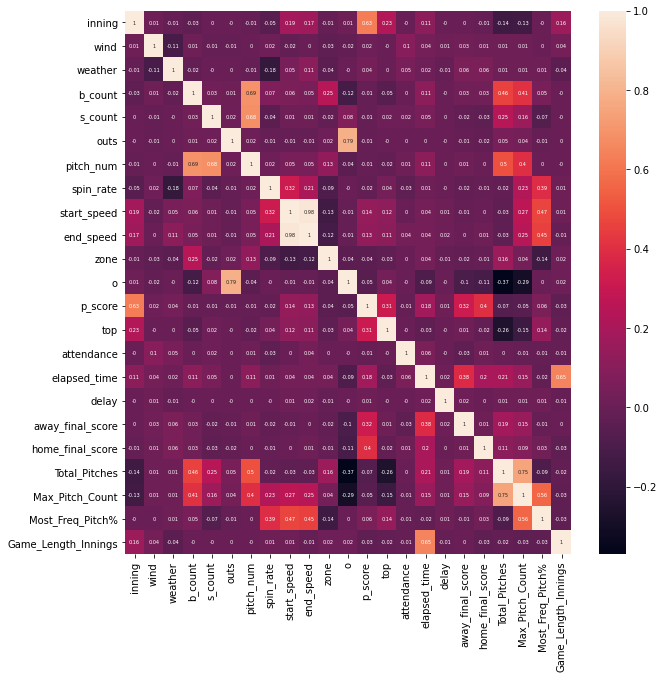

In [36]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Repeating the correlation matrix calculation from above, this time excluding IDs, see below the resulting heatmap
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df_grouped_merged.drop(['g_id','ab_id'],axis = 1).corr().round(2), annot=True, annot_kws={"size": 5},ax=ax)

In [37]:
# And finally the order dataframe of highest absolute correlation values:
Correls[(Correls['Correl_Abs'] != 1) & (Correls['Correl_Abs'] >= 0.4)].sort_values(by = 'Correl_Abs', ascending = False)

# We can see 7 variables correlations above 0.4 & 2 above 0.7 
    # of which we consider the latter to threaten with multi-collinearity
    # Start-End speed fairly obviously related
    # Outs refer to the number of outs before the pitch happened - o denote the number of outs AFTER the pitch/atbat

# Pitch_Nr & bat / Strike count also seems trivial: the more balls are thrown, the more balls are hit or striked generally

,X_var,Y_var,Correl,Correl_Abs
115,start_speed,end_speed,0.9784,0.9784
132,end_speed,start_speed,0.9784,0.9784
63,outs,o,0.7873,0.7873
165,o,outs,0.7873,0.7873
22,b_count,pitch_num,0.6877,0.6877
73,pitch_num,b_count,0.6877,0.6877
40,s_count,pitch_num,0.6834,0.6834
74,pitch_num,s_count,0.6834,0.6834
125,start_speed,Most_Freq_Pitch%,0.4746,0.4746
312,Most_Freq_Pitch%,start_speed,0.4746,0.4746


### Scatterplot Visuals

In [38]:
colors = {'FF':'red', 'CU': 'blue', 'CH':'green', 
          'SI':'black', 'SL':'yellow', 'FC':'orange', 
          'FS':'purple', 'KN':'magenta', 'KC':'aqua', 'Other': 'white'}

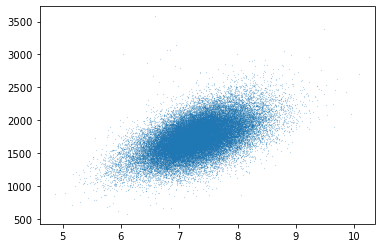

In [42]:
df_grouped_merged['speed_drop'] = df_grouped_merged['start_speed'] - df_grouped_merged['end_speed']

plt.scatter(df_grouped_merged['speed_drop'], df_grouped_merged['spin_rate'], s= 0.01)
plt.show()

weather


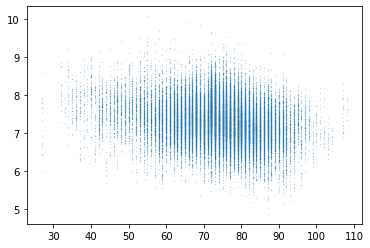

wind


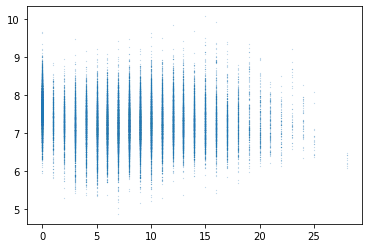

spin_rate


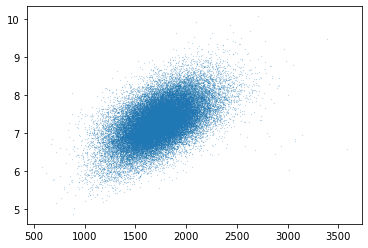

start_speed


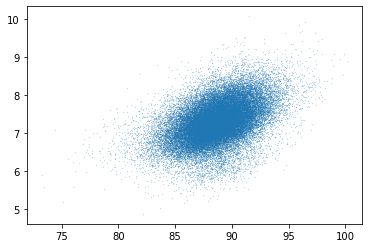

In [43]:
# Let us check speed drop vs weather, wind, spin_rate, start_speed
for i in ['weather','wind','spin_rate','start_speed']:
    print(i)
    plt.scatter(df_grouped_merged[i],df_grouped_merged['speed_drop'], s=0.01)
    plt.show()